# 项目简介：
本项目基于WeRateDogs的推特档案，通过不同的方法进行额外数据收集以完善该档案，接着对数据集进行质量和整洁度的评估（共列出了10个质量问题和2个整洁度问题），然后依据评估结果针对列出的每个问题进行数据清洗，得到干净整洁的数据集，最后对数据集进行存储、分析和可视化。共分析了如下四个问题：1.获取点赞和转发总数排名前三的狗狗推特信息；
2.点赞和转发数与狗狗评分是否成正比关系？或者说点赞和转发数高的狗狗评分集中在什么区域？
3.最受欢迎的狗狗名字有哪些？
4.哪个地位(stage)的狗狗更受欢迎与青睐？     
最终我们得到了如上四个问题的见解，同时针对后三个问题形成了相应的可视化图形。
该项目可以分成如下四部分，我们逐个展示：
## 数据收集
## 数据评估
## 数据清洗
## 数据存储
## 数据分析及可视化

In [1]:
#导入库
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt 
%matplotlib inline

## 数据收集

1.收集WeRateDogs推特档案（资料来源-手头文件）
2.收集推特图像的预测数据（资料来源-通过Python提供的Requests库及url编程下载）
3.收集额外附加数据，例如转发数和赞数（资料来源-使用Python通过Tweepy库查询API中推特的JSON数据）

In [2]:
###收集WeRateDogs推特档案（资料来源-手头文件）
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
###收集推特图像的预测数据（资料来源-通过Python提供的Requests库及url编程下载）
file_name = 'image_predictions.tsv'
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open(file_name ,mode = 'wb') as file:
    file.write(response.content)
    
#将数据文件image_predictions.tsv导入Python
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [6]:
###收集额外附加数据，例如转发数和赞数（资料来源-使用Python通过Tweepy库查询API中推特的JSON数据）
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

###编写‘tweet_json’数据
tweet_json = []
for tweet_id in twitter_archive['tweet_id'].values:
    try:
        retweet_count = api.get_status(tweet_id,tweet_mode='extended').retweet_count
        favorite_count = api.get_status(tweet_id,tweet_mode='extended').favorite_count
        tweet_json.append({
              'tweet_id':int(tweet_id),
              'retweet_count':int(retweet_count),
              'favorite_count':int(favorite_count)
              }) 
    except:
        print('No status found with that ID.')

No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
Rate limit reached. Sleeping for: 473
No status found with that ID.
No status found with that ID.
Rate limit reached. Sleeping for: 701
Rate limit reached. Sleeping for: 696
Rate limit reached. Sleeping for: 712
Rate limit reached. Sleeping for: 722


In [7]:
###将‘tweet_json’数据写入'tweet_json.txt'文件
with open('tweet_json.txt','w') as file:
    json.dump(tweet_json,file)

In [4]:
###创建dataframe文件，读取'tweet_json.txt'文件数据
with open('tweet_json.txt') as json_file:
    tweet_json = json.load(json_file)
    df_tweet_json = pd.DataFrame(tweet_json,columns=['tweet_id','retweet_count','favorite_count'])

## 数据评估

In [5]:
###探究数据集twitter_archive各列数据类型及空值情况
twitter_archive.info()
twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
###探究数据集twitter_archive评分分子列（rating_numerator）和评分分母列（rating_denominator）唯一值数量
###这样做的原因是猜测某些唯一值数量少的有可能是异常值，需要进一步核实
print(twitter_archive.rating_numerator.value_counts())
print(twitter_archive['rating_denominator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [7]:
###根据相关text检查狗狗评分分子有可能异常的值
pd.set_option("max_colwidth",200)
twitter_archive.query("rating_numerator in [420,0,15,75,80,20,24,26,44,50,60,165,84,88,144,182,143,666,960,1776,17,27,45,99,121,204] ").iloc[:,np.r_[0,5,10,11]]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70


In [8]:
###根据相关text检查狗狗评分分母有可能异常的值
twitter_archive.query("rating_denominator in [11,50,80,20,2,16,40,70,15,90,110,120,130,150,170,7,0] ").iloc[:,np.r_[0,5,10,11]]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [9]:
###用sample检查狗狗名字可能存在的异常值
print(twitter_archive['name'].sample(20))

1709       Brody
227         Odin
1047        Beya
142     Meatball
2334           a
1611        None
144        Albus
2177        None
2202        None
1878           a
884        Sadie
23        Canela
1078        Kyle
1284        Bear
106       Lassie
638         Dave
2053    Penelope
851         Tove
1487        Milo
2178        None
Name: name, dtype: object


通过上面程序，发现两个现象：

1.有些狗狗名字是小写字母开头的名词(life,space,light)、冠词(a,an,the)、形容词(mad,unacceptable)或
副词(not,such,very,quite，incredibly,just,my,his,actually,this,all,by,officially等);

2.有些狗狗名字是‘None’；

需要弄清楚上述两种名字的出现是否是文本中提取不到有关'name'的信息

In [10]:
### 提取狗狗名字是小写字母的数据集片段name_islower
name_islower = twitter_archive[twitter_archive['name'].str.islower()==True]
### 找到name_islower中text里包含字符串'name'的数据片段，以布尔值表示
text_name_islower = name_islower.text.str.contains('name')
### 结合上述数据集和Series，得到狗狗名字是小写字母但文本中含有'name'字符串的数据集（该数据集利用iloc函数只显示tweet_id,text和name三列）
name_islower[text_name_islower].iloc[:,np.r_[0,5,12]]

,tweet_id,text,name
852,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my
1853,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a
1955,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a
2034,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,a
2066,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a
2116,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,a
2125,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a
2128,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,a
2146,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,a
2161,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,a


In [11]:
### 提取狗狗名字是'None'的数据集片段name_none
name_isnone = twitter_archive[twitter_archive['name']=='None']
### 找到name_none中text里包含字符串'name'的数据片段，以布尔值表示
text_name_isnone = name_isnone.text.str.contains('name')
### 结合上述数据集和Series，得到狗狗名字是'None'但文本中含'name'字符串的数据集（该数据集利用iloc函数只显示tweet_id,text和name三列）
name_isnone[text_name_isnone].iloc[:,np.r_[0,5,12]]

,tweet_id,text,name
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
149,863079547188785154,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",None
168,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None
603,798628517273620480,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,None
843,766714921925144576,His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,None
1596,686286779679375361,When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,None
1678,682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,None
1734,679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,None
2086,670803562457407488,I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR,None
2166,669363888236994561,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,None


In [12]:
###评估狗狗地位
print(twitter_archive['doggo'].value_counts())
print(twitter_archive['pupper'].value_counts())
print(twitter_archive['floofer'].value_counts())
print(twitter_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [13]:
###检查狗狗地位的评估有无冲突值，即同一张原始图片却评估出不同的狗狗地位
dog_stage_text = twitter_archive.iloc[:,np.r_[0,5,13:17]]
dog_stage = twitter_archive.iloc[:,13:17]
### 找出包含两个及以上狗狗地位的行，这样可以根据相应文本信息核实哪个地位正确
dog_stage_text[(dog_stage!='None').sum(axis=1)>=2]

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


In [14]:
###探索image_predictions数据集
image_predictions.info()
image_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
###比较twitter_archive和image_predictions数据集中tweet_id数量
twitter_archive.tweet_id.count() - image_predictions.tweet_id.count() > 0

True

In [16]:
###探索df_tweet_json数据集
df_tweet_json.info()
df_tweet_json.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8575,38749
1,892177421306343426,6303,33201
2,891815181378084864,4187,25000
3,891689557279858688,8702,42148
4,891327558926688256,9461,40288


In [17]:
###探索df_tweet_json数据集转发数和点赞数
print(df_tweet_json.retweet_count.sort_values())
print(df_tweet_json.favorite_count.sort_values())

284         0
1284        2
334         2
111         3
267         3
29          4
1069        6
54          7
418        10
63         10
2328       13
2287       14
181        17
1512       19
174        20
2308       21
207        23
1226       25
2178       25
183        28
99         28
400        29
601        32
2249       33
2213       34
956        35
2248       35
2326       35
338        36
874        37
        ...  
438     21141
302     23184
928     23184
520     23345
441     23345
1066    23496
879     23496
1614    23688
644     23688
150     24253
647     25038
113     26767
614     26852
1755    30197
450     30352
295     30352
164     31673
160     32292
859     32292
1819    33660
131     36371
528     39376
437     40972
440     40972
65      44592
404     49045
1068    50800
807     50802
525     61007
1028    77236
Name: retweet_count, Length: 2345, dtype: int64
453          0
884          0
426          0
425          0
422          0
416          0
413     

### 质量问题
#### twitter_archive数据集：

1.数据并不都是狗狗的原始评级，也包括转发；
2.存在无狗狗图片的推特；
3.数据并不都是狗狗评级，也包括别的物种；

##### 数据类型错误：
4.timestamp时间戳的类型是字符串；
5.in_reply_to_status_id和in_reply_to_user_id列的数据类型是float,导致显示出来的id号码格式不正确；

##### 狗狗评分错误或无效（错误值——>正确值——>tweet_id）：
6.狗狗评分错误的包括：
-75/10 ——> 9.75/10(分子唯一)——>tweet_id:786709082849828864
-27/10 ——> 11.27/10(分子唯一)——>tweet_id:778027034220126208
-26/10 ——> 11.26/10(分子唯一)——>tweet_id:680494726643068929
-4/20 ——> 13/10(分母唯一)——>tweet_id:722974582966214656
-50/50 ——> 11/10(分子唯一)——>tweet_id:716439118184652801
-1/2 ——> 9/10(分母唯一)——>tweet_id:666287406224695296
7.狗狗评分无效的包括：
-960/0 ——> 13/10(分子和分母都唯一)——>tweet_id:835246439529840640
-11/15/15是日期，而不是评分(仅此一行)——> tweet_id:832088576586297345
-24/7指 all the time，而不是评分(仅此一行)——>tweet_id:810984652412424192

##### 狗狗名字错误（错误名字——>正确名字——>tweet_id）：
8.有些狗狗名字是小写字母开头的名词(life,space,light)、冠词(a,an,the)、形容词(mad,unacceptable)或
副词(not,such,very,quite，incredibly,just,my,his,actually,this,all,by,officially等，例如：

-‘my’——>'Zoey'——>tweet_id:765395769549590528
-‘a’——>'Wylie'——>tweet_id:675706639471788032
-‘a’——>'Kip'——>tweet_id:673636718965334016
-‘a’——>' Jacob'——>tweet_id:671743150407421952
-‘a’——>'Rufus'——>tweet_id:671147085991960577
-‘a’——>'Spork'——>tweet_id:670427002554466305
-‘a’——>'Cherokee'——>tweet_id:670361874861563904
-‘a’——>'Hemry'——>tweet_id:670303360680108032
-‘a’——>'Alphred'——>tweet_id:669923323644657664
-‘a’——>'Alfredo'——>tweet_id:669564461267722241
-‘a’——>' Leroi'——>tweet_id:668955713004314625
-‘an’——>'Berta'——>tweet_id:668636665813057536
-‘a’——>'Chuk'——>tweet_id:668507509523615744
-‘a’——>'Alfonso'——>tweet_id:668171859951755264
-‘a’——>'Cheryl'——>tweet_id:667861340749471744
-‘a’——>'Jessiga'——>tweet_id:667773195014021121
-‘a’——>'Klint'——>tweet_id:667538891197542400
-‘a’——>'Kohl'——>tweet_id:667470559035432960
-‘a’——>'Pepe'——>tweet_id:666983947667116034
-‘a’——>'Octaviath'——>tweet_id:666781792255496192
-‘a’——>'Johm'——>tweet_id:666701168228331520
-‘a’——>'Daryl'——>tweet_id:667177989038297088

9.有些狗狗名字叫‘None’
-'None'——>'Howard'——>tweet_id:885518971528720385
-'None'——>'pablo'——>tweet_id:863079547188785154
-'None'——>'Zoey'——>tweet_id:859607811541651456
-'None'——>'Tickles'——>tweet_id:798628517273620480
-'None'——>'Chariey'——>tweet_id:766714921925144576
-'None'——>'Sabertooth'——>tweet_id:679736210798047232
-'None'——>'Zeus'——>tweet_id:669363888236994561	
-'None'——>'Guss'——>tweet_id:668268907921326080
-'None'——>'Big Jumpy Rat'——>tweet_id:667524857454854144
-'None'——>'Tickles'——>tweet_id:667509364010450944	
-'None'——>'Cupit and Prencer'——>tweet_id:666835007768551424

##### 狗狗地位分类冲突（错误分类——>正确分类—>tweet_id）：
10.狗狗地位分类冲突的包含：
-‘doggo’——>'puppo'——>tweet_id:855851453814013952
-‘doggo’——>'floofer'——>tweet_id:854010172552949760
-‘pupper’——>'doggo'——>tweet_id:817777686764523521
-‘pupper’——>'doggo'——>tweet_id:801115127852503040
-‘pupper’——>'doggo'——>tweet_id:785639753186217984
-tweet_id为751583847268179968的图片不包含狗狗

注：下列tweet_id的图片中均有两只狗狗，地位分别为一只‘pupper’和一只'doggo'：
-808106460588765185
-802265048156610565
-781308096455073793
-733109485275860992
-741067306818797568	
-759793422261743616

#### image_predictions数据集：    
11.image_predictions数据框中列标题描述不清楚。

### 整洁度问题
1.doggo、pupper、puppo和floofer作为列出现，而它们都属于狗狗的地位(stage)；
2.tweet_archive、image_predictions、df_tweet_json三个数据框描述的是同一个观察单位。

## 数据清理

In [18]:
### 复制原始数据集
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

### 质量问题-1

1.数据并不都是狗狗的原始评级，也包括转发；

#### Define
通过提取twitter_archive_clean数据集中retweeted_status_id列为空值的部分，得到不含转发的狗狗原始评级数据集，然后删除retweeted_status_id列、retweeted_status_user_id列和retweeted_status_timestamp列。

#### Code

In [19]:
#### 提取twitter_archive_clean数据集中retweeted_status_id列为空值的部分
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()] 
####测试twitter_archive_clean中是否有retweeted_status_id不为空值的行
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
### 删除retweeted_status_id、retweeted_status_user_id和retweeted_status_timestamp列
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### 整洁度问题

1.doggo、pupper、puppo和floofer作为列出现，而它们都属于狗狗的地位(stage)； 
2.tweet_archive、image_predictions、df_tweet_json三个数据框描述的是同一个观察单位，且三个数据框都含有tweet_id列。

#### Define
-方法1:
利用融合函数将狗狗分类doggo、pupper、puppo和floofer作为变量stage的特征值出现
-方法2:
删除数据集tweet_archive_clean有关狗狗地位的四列，重新提取text中有关狗狗stage的信息， 将‘stage’作为新列引入数据框中。

#### Code

In [14]:
"""
#### 方法1:

####把狗狗地位分类值缺失的列‘doggo’,'floofer','pupper','puppo'中None值改为NaN
twitter_archive_clean.loc[(twitter_archive_clean.doggo=='None')& (twitter_archive_clean.floofer=='None')&
                      (twitter_archive_clean.pupper=='None')& (twitter_archive_clean.puppo=='None'),['doggo','floofer','pupper','puppo']]=np.nan

####利用融合函数将狗狗分类doggo、pupper、puppo和floofer作为变量stage的特征值
twitter_archive_clean = pd.melt(twitter_archive_clean,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id',
                                'timestamp','source','text','expanded_urls','rating_numerator','rating_denominator',
                                'name'],value_vars=['doggo','floofer','pupper','puppo'],value_name='stage')
                                
                                
####删除融合后自动生成的variable列
twitter_archive_clean.drop('variable',axis=1,inplace=True)
####提取stage列不等于None的行
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.stage != 'None']
####twitter_archive_clean去重
twitter_archive_clean.drop_duplicates(inplace=True)

####找到所有 tweet_id 重复的项，将其对应的 stage 赋值为 multiple
df = twitter_archive_clean[twitter_archive_clean.duplicated(subset='tweet_id')]
for tweet_id in df.tweet_id:
    twitter_archive_clean.loc[twitter_archive_clean.tweet_id == tweet_id,'stage']='multiple'
    
#### 去重
twitter_archive_clean.drop_duplicates(inplace=True)
"""

In [22]:
#### 方法2：

#### 重新提取text中有关狗狗stage的信息， 将‘stage’作为新列引入数据框中
all_dog_stages = twitter_archive_clean['text'].str.lower().str.findall(r"(doggo|floofer|pupper|puppo)")
twitter_archive_clean['stage'] = [set(dog_stage) for dog_stage in all_dog_stages.values]
twitter_archive_clean['stage'] = twitter_archive_clean.stage.apply(lambda x: ','.join(x))

In [23]:
#### 删除之前狗狗分类的四列'doggo','floofer','pupper','puppo'
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace= True)

In [24]:
#### 将'stage'列中空值设为NaN
twitter_archive_clean.stage.replace('',np.nan,inplace=True)

#### Test

In [25]:
#### 查看狗狗stage列的唯一值情况
print(twitter_archive_clean.stage.value_counts())
twitter_archive_clean.stage.unique()

pupper           250
doggo             82
puppo             31
doggo,pupper      10
floofer            9
doggo,puppo        2
doggo,floofer      1
Name: stage, dtype: int64


array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [26]:
print(twitter_archive_clean.info())
twitter_archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    385 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB
None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### Define
twitter_archive_clean、image_predictions_clean、df_tweet_json_clean三个数据集描述的是同一个观察单位，所以利用merge函数将上述三个数据片段进行合并，保证合并后的数据集只有一列tweet_id。这样做的同时解决了有些推特无狗狗图片的质量问题，因为将twitter_archive_clean和image_predictions使用 inner 方式进行合并可以滤除无图片的推特。

#### Code

In [27]:
####利用merge函数，合并数据集twitter_archive_clean和image_predictions_clean
tweet_image_merge = pd.merge(twitter_archive_clean,image_predictions_clean,on='tweet_id')

In [28]:
####利用merge函数，合并数据集tweet_image_merge和df_tweet_json_clean，得到总数据集tweet_image_json_merge
tweet_image_json_merge = pd.merge(tweet_image_merge,df_tweet_json_clean,on='tweet_id')

#### Test

In [29]:
tweet_image_json_merge.info()
tweet_image_json_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    342 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       199

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8575,38749
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6303,33201
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4187,25000
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8702,42148
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9461,40288


### 质量问题-2
#### twitter_archive 数据集

1.数据并不都是狗狗评级，也包括别的物种；

##### 数据类型错误：
2.timestamp时间戳的类型是字符串；
3.in_reply_to_status_id和in_reply_to_user_id列的数据类型是float,导致显示出来的id号码格式不正确；

##### 狗狗评分错误或无效（错误值——>正确值——>tweet_id）：
4.狗狗评分错误
-75/10 ——> 9.75/10(分子唯一)——>tweet_id:786709082849828864
-27/10 ——> 11.27/10(分子唯一)——>tweet_id:778027034220126208
-26/10 ——> 11.26/10(分子唯一)——>tweet_id:680494726643068929
-4/20 ——> 13/10(分母唯一)——>tweet_id:722974582966214656
-50/50 ——> 11/10(分子唯一)——>tweet_id:716439118184652801
-1/2 ——> 9/10(分母唯一)——>tweet_id:666287406224695296

5.狗狗评分无效
-960/0 ——> 13/10(分子和分母都唯一)——>tweet_id:835246439529840640
-11/15/15是日期，而不是评分(仅此一行)——> tweet_id:832088576586297345
-24/7指 all the time，而不是评分(仅此一行)——>tweet_id:810984652412424192


##### 狗狗名字错误（错误名字——>正确名字——>tweet_id）：
6.有些狗狗名字是小写字母开头的名词(life,space,light)、冠词(a,an,the)、形容词(mad,unacceptable)或
副词(not,such,very,quite，incredibly,just,my,his,actually,this,all,by,officially等，例如：

-‘my’——>'Zoey'——>tweet_id:765395769549590528
-‘a’——>'Wylie'——>tweet_id:675706639471788032
-‘a’——>'Kip'——>tweet_id:673636718965334016
-‘a’——>' Jacob'——>tweet_id:671743150407421952
-‘a’——>'Rufus'——>tweet_id:671147085991960577
-‘a’——>'Spork'——>tweet_id:670427002554466305
-‘a’——>'Cherokee'——>tweet_id:670361874861563904
-‘a’——>'Hemry'——>tweet_id:670303360680108032
-‘a’——>'Alphred'——>tweet_id:669923323644657664
-‘a’——>'Alfredo'——>tweet_id:669564461267722241
-‘a’——>' Leroi'——>tweet_id:668955713004314625
-‘an’——>'Berta'——>tweet_id:668636665813057536
-‘a’——>'Chuk'——>tweet_id:668507509523615744
-‘a’——>'Alfonso'——>tweet_id:668171859951755264
-‘a’——>'Cheryl'——>tweet_id:667861340749471744
-‘a’——>'Jessiga'——>tweet_id:667773195014021121
-‘a’——>'Klint'——>tweet_id:667538891197542400
-‘a’——>'Kohl'——>tweet_id:667470559035432960
-‘a’——>'Pepe'——>tweet_id:666983947667116034
-‘a’——>'Octaviath'——>tweet_id:666781792255496192
-‘a’——>'Johm'——>tweet_id:666701168228331520
-‘a’——>'Daryl'——>tweet_id:667177989038297088

7.有些狗狗名字叫‘None’
-'None'——>'Howard'——>tweet_id:885518971528720385
-'None'——>'pablo'——>tweet_id:863079547188785154
-'None'——>'Zoey'——>tweet_id:859607811541651456
-'None'——>'Tickles'——>tweet_id:798628517273620480
-'None'——>'Sabertooth'——>tweet_id:679736210798047232
-'None'——>'Zeus'——>tweet_id:669363888236994561	
-'None'——>'Guss'——>tweet_id:668268907921326080
-'None'——>'Big Jumpy Rat'——>tweet_id:667524857454854144
-'None'——>'Tickles'——>tweet_id:667509364010450944	
-'None'——>'Cupit and Prencer'——>tweet_id:666835007768551424

##### 狗狗地位分类冲突
8.狗狗地位分类冲突的包含：
-‘doggo’——>'puppo'——>tweet_id:855851453814013952
-‘doggo’——>'floofer'——>tweet_id:854010172552949760
-‘pupper’——>'doggo'——>tweet_id:817777686764523521
-‘pupper’——>'doggo'——>tweet_id:801115127852503040
-‘pupper’——>'doggo'——>tweet_id:785639753186217984
 tweet_id为751583847268179968的图片不包含狗狗
 
注：下列tewwt_id的图片中均有两只狗狗，地位分别为一只‘pupper’和一只'doggo'：
-808106460588765185
-802265048156610565
-781308096455073793
-733109485275860992
-741067306818797568	
-759793422261743616

#### image_predictions数据集：    
9.image_predictions数据框中列标题描述不清楚；

#### Define

清除数据集中三次预测结果都不是狗狗的行

#### Code

In [30]:
#### 清除数据集中三次预测结果都不是狗狗的行
tweet_image_json_merge = tweet_image_json_merge[~((tweet_image_json_merge['p1_dog']==False) & (tweet_image_json_merge['p2_dog']==False) & (tweet_image_json_merge['p3_dog']==False))]

#### Test

In [31]:
#### 确认数据集tweet_image_json_merge中不存在三次预测都不是狗狗的行
((tweet_image_json_merge['p1_dog']==False) & (tweet_image_json_merge['p2_dog']==False) & (tweet_image_json_merge['p3_dog']==False)).sum()

0

In [20]:
tweet_image_json_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 24 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null object
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1686 non-null object
stage                    288 non-null object
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
p1                       1686 non-null object
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null bool
p2                       1686 non-null object
p2_conf                  1686 non-null float64
p2_dog                   1686 non-null bool
p3                       168

#### Define
1.通过pd.to_datetime修改数据集中时间戳的数据类型为datetime；
2.通过astype将in_reply_to_status_id、in_reply_to_user_id列的数据类型改为int型；
3.修改stage为分类数据类型；

#### Code

In [32]:
####通过pd.to_datetime将时间戳的数据类型转换为datetime
tweet_image_json_merge['timestamp'] = pd.to_datetime(tweet_image_json_merge['timestamp'])
####通过astype将in_reply_to_status_id和in_reply_to_user_id两列的数据类型转换为int型（其中缺失值用0表示）
tweet_image_json_merge[['in_reply_to_status_id','in_reply_to_user_id']] = tweet_image_json_merge[['in_reply_to_status_id','in_reply_to_user_id']].fillna(0).astype(int)
####通过astype修改stage列的数据类型为category
tweet_image_json_merge['stage'] = tweet_image_json_merge['stage'].astype('category')

#### Test

In [33]:
tweet_image_json_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 24 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    1686 non-null int64
in_reply_to_user_id      1686 non-null int64
timestamp                1686 non-null datetime64[ns]
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1686 non-null object
stage                    288 non-null category
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
p1                       1686 non-null object
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null bool
p2                       1686 non-null object
p2_conf                  1686 non-null float64
p2_dog                   1686 non-null bool
p3                

#### Define

1.利用replace或loc函数纠正错误的狗狗评分，
-75/10 (分子唯一) 更正为9.75/10，对应的tweet_id是786709082849828864；
-27/10 (分子唯一) 更正为11.27/10，对应的tweet_id是778027034220126208；
-26/10 (分子唯一) 更正为11.26/10，对应的tweet_id是680494726643068929；
-4/20 (分母唯一) 更正为13/10 ，对应的tweet_id是722974582966214656；
-50/50 (分子唯一) 更正为11/10，对应的tweet_id是716439118184652801；
-1/2 (分母唯一) 更正为9/10，对应的tweet_id是666287406224695296；
-(空)960/0 (分子和分母都唯一) 更正为13/10，对应的tweet_id是835246439529840640；
2.删除无效的狗狗评分（无效值均仅此一行）
-(空)删除评分11/15所在的行，对应的tweet_id是832088576586297345；
-删除评分24/7所在的行，对应的tweet_id是810984652412424192.

#### Code

In [34]:
#### 利用replace替换错误的狗狗评分(只需更正分子，且分子在数据集里唯一)
#75/10更正为9.75/10
#27/10更正为11.27/10
#26/10更正为11.26/10
tweet_image_json_merge['rating_numerator'].replace({75:int(9.75),27:int(11.27),26:int(11.26)},inplace=True)

# 4/20更正为13/10
tweet_image_json_merge.loc[tweet_image_json_merge.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]= [13,10]

# 50/50更正为11/10
tweet_image_json_merge.loc[tweet_image_json_merge.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]= [11,10]

# 1/2更正为9/10
tweet_image_json_merge.loc[tweet_image_json_merge.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]= [9,10]

#### 利用drop删除无效的狗狗评分所在的行
index = tweet_image_json_merge.query("tweet_id==810984652412424192").index
tweet_image_json_merge.drop(index,inplace=True)

#### Test

In [35]:
####替换后应为空
#75/10更正为9.75/10
tweet_image_json_merge[tweet_image_json_merge.rating_numerator==75]
#27/10更正为11.27/10
tweet_image_json_merge[tweet_image_json_merge.rating_numerator==27]
#26/10更正为11.26/10
tweet_image_json_merge[tweet_image_json_merge.rating_numerator==26]
# 4/20更正为13/10
tweet_image_json_merge.query("rating_numerator==4 and rating_denominator==20")
# 1/2更正为9/10
tweet_image_json_merge.query("rating_numerator==1 and rating_denominator==2")


####确认完成替换

print(tweet_image_json_merge.query("tweet_id==786709082849828864")[['tweet_id','rating_numerator','rating_denominator']])
print(tweet_image_json_merge.query("tweet_id==778027034220126208")[['tweet_id','rating_numerator','rating_denominator']])
print(tweet_image_json_merge.query("tweet_id==680494726643068929")[['tweet_id','rating_numerator','rating_denominator']])
print(tweet_image_json_merge.query("tweet_id==722974582966214656")[['tweet_id','rating_numerator','rating_denominator']])
print(tweet_image_json_merge.query("tweet_id==716439118184652801")[['tweet_id','rating_numerator','rating_denominator']])
print(tweet_image_json_merge.query("tweet_id==666287406224695296")[['tweet_id','rating_numerator','rating_denominator']])

####确认删除完成
tweet_image_json_merge.query("tweet_id==810984652412424192")

               tweet_id  rating_numerator  rating_denominator
503  786709082849828864                 9                  10
               tweet_id  rating_numerator  rating_denominator
553  778027034220126208                11                  10
                tweet_id  rating_numerator  rating_denominator
1374  680494726643068929                11                  10
               tweet_id  rating_numerator  rating_denominator
891  722974582966214656                13                  10
               tweet_id  rating_numerator  rating_denominator
925  716439118184652801                11                  10
                tweet_id  rating_numerator  rating_denominator
1973  666287406224695296                 9                  10


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


#### Define

数据集中小写字母开头的狗狗名字应视为无效名字，例如'a','an'等，这种情况的出现是由于提取文本时只提取了“This is...”或“Here is...”后面的词语，但是发现很大一部分狗狗名字出现在文本“named...”、“name is...”或‘names are...’后面的词语中。

利用df.index.str.extract()和正则表达式，将文本中'named'和'name is'后面的的狗狗名字提取出来，再通过replace或loc函数替换为相应文本的狗狗名字。

-‘my’——>'Zoey'——>tweet_id:765395769549590528
-‘a’——>'Wylie'——>tweet_id:675706639471788032
-‘a’——>'Kip'——>tweet_id:673636718965334016
-‘a’——>'Jacob'——>tweet_id:671743150407421952
-‘a’——>'Rufus'——>tweet_id:671147085991960577
-‘a’——>'Spork'——>tweet_id:670427002554466305
（空值）‘a’——>'Cherokee'——>tweet_id:670361874861563904
-‘a’——>'Hemry'——>tweet_id:670303360680108032
（空值）‘a’——>'Alphred'——>tweet_id:669923323644657664
-‘a’——>'Alfredo'——>tweet_id:669564461267722241
-‘a’——>' Leroi'——>tweet_id:668955713004314625
-‘an’——>'Berta'——>tweet_id:668636665813057536
-‘a’——>'Chuk'——>tweet_id:668507509523615744
-‘a’——>'Alfonso'——>tweet_id:668171859951755264
-‘a’——>'Cheryl'——>tweet_id:667861340749471744
-‘a’——>'Jessiga'——>tweet_id:667773195014021121
-‘a’——>'Klint'——>tweet_id:667538891197542400
-‘a’——>'Kohl'——>tweet_id:667470559035432960
（空值）‘a’——>'Pepe'——>tweet_id:666983947667116034
-‘a’——>'Octaviath'——>tweet_id:666781792255496192
-‘a’——>'Johm'——>tweet_id:666701168228331520
-‘a’——>'Daryl'——>tweet_id:667177989038297088
-'None'——>'pablo'——>tweet_id:863079547188785154
-'None'——>'Zoey'——>tweet_id:859607811541651456
-'None'——>'Sabertooth'——>tweet_id:679736210798047232
-'None'——>'Zeus'——>tweet_id:669363888236994561	
-'None'——>'Guss'——>tweet_id:668268907921326080
-'None'——>'Big Jumpy Rat'——>tweet_id:667524857454854144
-'None'——>'Tickles'——>tweet_id:667509364010450944	
-'None'——>'Cupit and Prencer'——>tweet_id:666835007768551424

#### Code

In [36]:
#### 提取数据集text中named，name is，name to，names are等字符串后面的名称
name = tweet_image_json_merge.text.str.extract('(?:name[a-z]?\s?[a-z]*) ([A-Z]\w+)',expand=False).str.rstrip()
#### 利用replace函数将狗狗名称中'None','my','a','an'替换为上面文本中提取出的名称
tweet_image_json_merge.name.replace(['None','my','a','an'],[name,name,name,name],inplace=True)
#### 单独处理狗狗名字'Big Jumpy Rat'和'Cupit and Prencer'
tweet_image_json_merge.loc[tweet_image_json_merge["tweet_id"]==667524857454854144,'name']='Big Jumpy Rat'
tweet_image_json_merge.loc[tweet_image_json_merge["tweet_id"]==666835007768551424,'name']='Cupit and Prencer'

虽然做了上述处理，但仍然不能保证所有狗狗名字都被从文本中正确提取。如果只是为了项目的数据清理练习，我们假设如下两点：
1.所有以大写字母开头的名称均提取正确；
2.对于不符合上述处理条件的小写字母开头的狗狗名称，均认为从文本中无法提取到名字信息。

In [37]:
####对于不包含'name'字段的以小写字母开头的狗狗名称，认为从文本中无法提取到名字信息，所以设置为空值NaN
tweet_image_json_merge.loc[tweet_image_json_merge['name'].str.islower()==True,'name']= np.nan

#### Test

In [38]:
#### 确认数据集中有无小写字母的狗狗名字
tweet_image_json_merge['name'].str.islower().sum()

0

In [39]:
#### 确认下列字典中tweet_id对应的name列修改成功
tweet_id_name = {765395769549590528:'Zoey',
                 675706639471788032:'Wylie',
                 673636718965334016:'Kip',
                 671743150407421952:'Jacob',
                 671147085991960577:'Rufus',
                 670427002554466305:'Spork',
                 #670361874861563904:'Cherokee',
                 670303360680108032:'Hemry',
                 #669923323644657664:'Alphred',
                 669564461267722241:'Alfredo',
                 668955713004314625:'Leroi',
                 668636665813057536:'Berta',
                 668507509523615744:'Chuk',
                 668171859951755264:'Alfonso',
                 667861340749471744:'Cheryl',
                 667773195014021121:'Jessiga',
                 667538891197542400:'Klint',
                 667470559035432960:'Kohl',
                 #666983947667116034:'Pepe',
                 666781792255496192:'Octaviath',
                 666701168228331520:'Johm',
                 667177989038297088:'Daryl',
                 863079547188785154:'Pablo',
                 859607811541651456:'Zoey',
                 679736210798047232:'Sabertooth',
                 669363888236994561:'Zeus',
                 668268907921326080:'Guss',
                 667524857454854144:'Big Jumpy Rat',
                 667509364010450944:'Tickles',
                 666835007768551424:'Cupit and Prencer'
                }

for tweet_id,name in tweet_id_name.items():
    name_check = tweet_image_json_merge[tweet_image_json_merge["tweet_id"] == tweet_id].name.item()
    if name_check == name:
        print("The dog name is correct!")
    else:
        print("Mistake!")

The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!
The dog name is correct!


#### Define

对于狗狗地位分类有冲突的，去除不正确的分类值，保留正确分类值。分类冲突的包含（错误值——正确值——tweet_id）：
-‘doggo’——>'puppo'——>tweet_id:855851453814013952
-‘doggo’——>'floofer'——>tweet_id:854010172552949760
-‘pupper’——>'doggo'——>tweet_id:817777686764523521
-‘pupper’——>'doggo'——>tweet_id:801115127852503040
-(空值)‘pupper’——>'doggo'——>tweet_id:785639753186217984
-删除tweet_id为751583847268179968的行，因为图片中不包含狗狗

#### Code

In [40]:
#### 删除前4个狗狗不正确的分类
tweet_id_stage = {855851453814013952:['doggo','puppo'],
            854010172552949760:['doggo','floofer'],
            817777686764523521:['pupper','doggo'],
            801115127852503040:['pupper','doggo'],
            #785639753186217984:['pupper','doggo']
            }

for tweet_id,stage in tweet_id_stage.items():
    tweet_image_json_merge = tweet_image_json_merge[~((tweet_image_json_merge.tweet_id==tweet_id) & (tweet_image_json_merge.stage==stage[0]))]

#### 删除tweet_id为751583847268179968的行 
index = tweet_image_json_merge.query("tweet_id==751583847268179968").index
tweet_image_json_merge.drop(index,inplace=True)  

#### Test

In [41]:
tweet_image_json_merge.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 1993
Data columns (total 24 columns):
tweet_id                 1684 non-null int64
in_reply_to_status_id    1684 non-null int64
in_reply_to_user_id      1684 non-null int64
timestamp                1684 non-null datetime64[ns]
source                   1684 non-null object
text                     1684 non-null object
expanded_urls            1684 non-null object
rating_numerator         1684 non-null int64
rating_denominator       1684 non-null int64
name                     1214 non-null object
stage                    287 non-null category
jpg_url                  1684 non-null object
img_num                  1684 non-null int64
p1                       1684 non-null object
p1_conf                  1684 non-null float64
p1_dog                   1684 non-null bool
p2                       1684 non-null object
p2_conf                  1684 non-null float64
p2_dog                   1684 non-null bool
p3                

In [42]:
#### 确认不正确的狗狗地位已删除
for tweet_id,stage in tweet_id_stage.items():
    stage_check = tweet_image_json_merge[tweet_image_json_merge.tweet_id==tweet_id].stage.values[0]
    if stage_check == stage[1]:
        print("The dog stage is correct!")
    else:
        print("Mistakes!")

Mistakes!
Mistakes!
Mistakes!
Mistakes!


#### define

更新原image_predictions数据框中列标题，使之描述更清楚一些。

#### Code

In [43]:
#### 更新原image_predictions数据框中列标题，使之描述更清楚一些
new_columns = {'jpg_url':'image_url',
               'img_num':'trusted_image_number',
               'p1':'prediction1_result',
               'p1_conf':'prediction1_confidence',
               'p1_dog':'prediction1_is_dog',
               'p2':'prediction2_result',
               'p2_conf':'prediction2_confidence',
               'p2_dog':'prediction2_is_dog',
               'p3':'prediction3_result',
               'p3_conf':'prediction3_confidence',
               'p3_dog':'prediction3_is_dog'
              }
tweet_image_json_merge.rename(columns= new_columns,inplace= True)

#### Test

In [44]:
tweet_image_json_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 1993
Data columns (total 24 columns):
tweet_id                  1684 non-null int64
in_reply_to_status_id     1684 non-null int64
in_reply_to_user_id       1684 non-null int64
timestamp                 1684 non-null datetime64[ns]
source                    1684 non-null object
text                      1684 non-null object
expanded_urls             1684 non-null object
rating_numerator          1684 non-null int64
rating_denominator        1684 non-null int64
name                      1214 non-null object
stage                     287 non-null category
image_url                 1684 non-null object
trusted_image_number      1684 non-null int64
prediction1_result        1684 non-null object
prediction1_confidence    1684 non-null float64
prediction1_is_dog        1684 non-null bool
prediction2_result        1684 non-null object
prediction2_confidence    1684 non-null float64
prediction2_is_dog        1684 non-null bool

In [35]:
#### 确认部分列名已更改
tweet_image_json_merge.columns[11:21]

Index(['image_url', 'trusted_image_number', 'prediction1_result',
       'prediction1_confidence', 'prediction1_is_dog', 'prediction2_result',
       'prediction2_confidence', 'prediction2_is_dog', 'prediction3_result',
       'prediction3_confidence'],
      dtype='object')

## 数据存储

In [45]:
tweet_image_json_merge.to_csv('twitter_archive_master.csv',index=False)

## 数据分析及可视化

### 根据清理好的数据集，我们要分析如下问题：
1.获取点赞和转发总数排名前三的狗狗推特信息；
2.点赞和转发数与狗狗评分是否成正比关系？或者说点赞和转发数高的狗狗评分集中在什么区域？
3.最受欢迎的狗狗名字有哪些？
4.哪个地位(stage)的狗狗更受欢迎与青睐？

In [46]:
#### 载入数据集twitter_archive_master.csv
df_dog = pd.read_csv('twitter_archive_master.csv')

#### 1.寻找点赞和转发总数排名前三的狗狗推特信息；

In [47]:
#### 转发和点赞总数排名前三的狗狗推特信息
df_dog['total_retweet_favorite_count'] = df_dog['retweet_count'] + df_dog['favorite_count']
df_dog.sort_values('total_retweet_favorite_count',ascending=False).head(3).iloc[:,np.r_[0,3,5:11,13:25]]


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,prediction1_result,prediction1_confidence,prediction1_is_dog,prediction2_result,prediction2_confidence,prediction2_is_dog,prediction3_result,prediction3_confidence,prediction3_is_dog,retweet_count,favorite_count,total_retweet_favorite_count
689,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,NaN,doggo,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,77236,128101,205337
278,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,NaN,puppo,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,49045,143195,192240
362,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,NaN,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,61007,122842,183849


由上表可知转发和点赞总数排名前三的狗狗推特信息如下：
1.排名第一的狗狗推特是2016年6月18日用户（推特ID:744234799360020481）发表的关于拉布拉多doggo（名字不详）在游泳池游泳的一段视频(https://twitter.com/dog_rates/status/744234799360020481/video/1)，获得评分13/10，转发数77236，点赞数128101；
2.排名第二的狗狗推特是2017年1月21日用户（推特ID:822872901745569793）发表的关于拉布拉多puppo（名字不详）参加多伦多妇女游行的图片
(https://twitter.com/dog_rates/status/822872901745569793/photo/1)，获得评分13/10，转发数49045，点赞数143195；
3.排名第三的狗狗推特是2016年12月9日用户（推特ID:807106840509214720）发表的关于吉娃娃Stephan(地位不详)主动当作抹布帮主人拖地的视频
(https://twitter.com/dog_rates/status/807106840509214720/video/1)，获得评分13/10，转发数61007，点赞数122842；

#### 2.点赞和转发数与狗狗评分是否成正比关系？或者说点赞和转发数高的狗狗图片评分集中在什么区域？

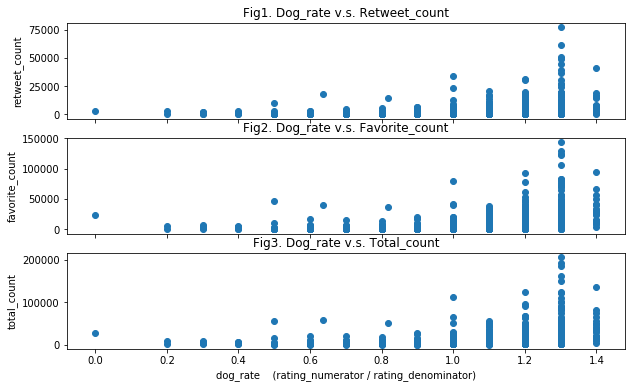

In [48]:
#### 分别绘制不同狗狗评分下相应转发数和点赞数的分布图
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(10,6),sharex=True)
x = df_dog['rating_numerator'] / df_dog['rating_denominator']
#### 绘制狗狗评分 v.s.转发数
ax1.scatter(x,df_dog['retweet_count'])
ax1.set_title('Fig1. Dog_rate v.s. Retweet_count')
ax1.set_ylabel('retweet_count')

#### 绘制狗狗评分 v.s.点赞数 
ax2.scatter(x,df_dog['favorite_count'])
ax2.set_title('Fig2. Dog_rate v.s. Favorite_count')
ax2.set_ylabel('favorite_count')

#### 绘制狗狗评分 v.s.（转发+点赞）总数
ax3.scatter(x,df_dog['total_retweet_favorite_count'])
ax3.set_title('Fig3. Dog_rate v.s. Total_count')
ax3.set_xlabel('dog_rate    (rating_numerator / rating_denominator)')
ax3.set_ylabel('total_count')

plt.show()

由上图可知，点赞和转发总数似乎并不是与狗狗评分成正比。虽然评分低（<10/10）的狗狗获得转发和点赞比评分高(>=12/10)的狗狗少，但并不是评分越高的狗狗获得的转发和点赞越多。可以发现评分为13/10的狗狗获得转发和点赞数最多。原因有可能是部分狗狗较高的评分（例如>=14/10）太主观，没有实至名归，也可能从评分者的角度来说，13/10已经是很高的评分了，获得此评分的狗狗里面有很多值得转发和点赞。

#### 3.最受欢迎的狗狗名字有哪些？

In [49]:
#### 获取最受欢迎的前20个狗狗名字
popular_dog_names = df_dog['name'].value_counts(ascending=False)[0:20]
popular_dog_names

Charlie    10
Cooper     10
Lucy       10
Oliver      9
Tucker      9
Penny       8
Daisy       7
Sadie       7
Winston     7
Jax         6
Toby        6
Koda        6
Lola        6
Rusty       5
Leo         5
Bella       5
Zoey        5
Stanley     5
Bo          5
Oscar       5
Name: name, dtype: int64

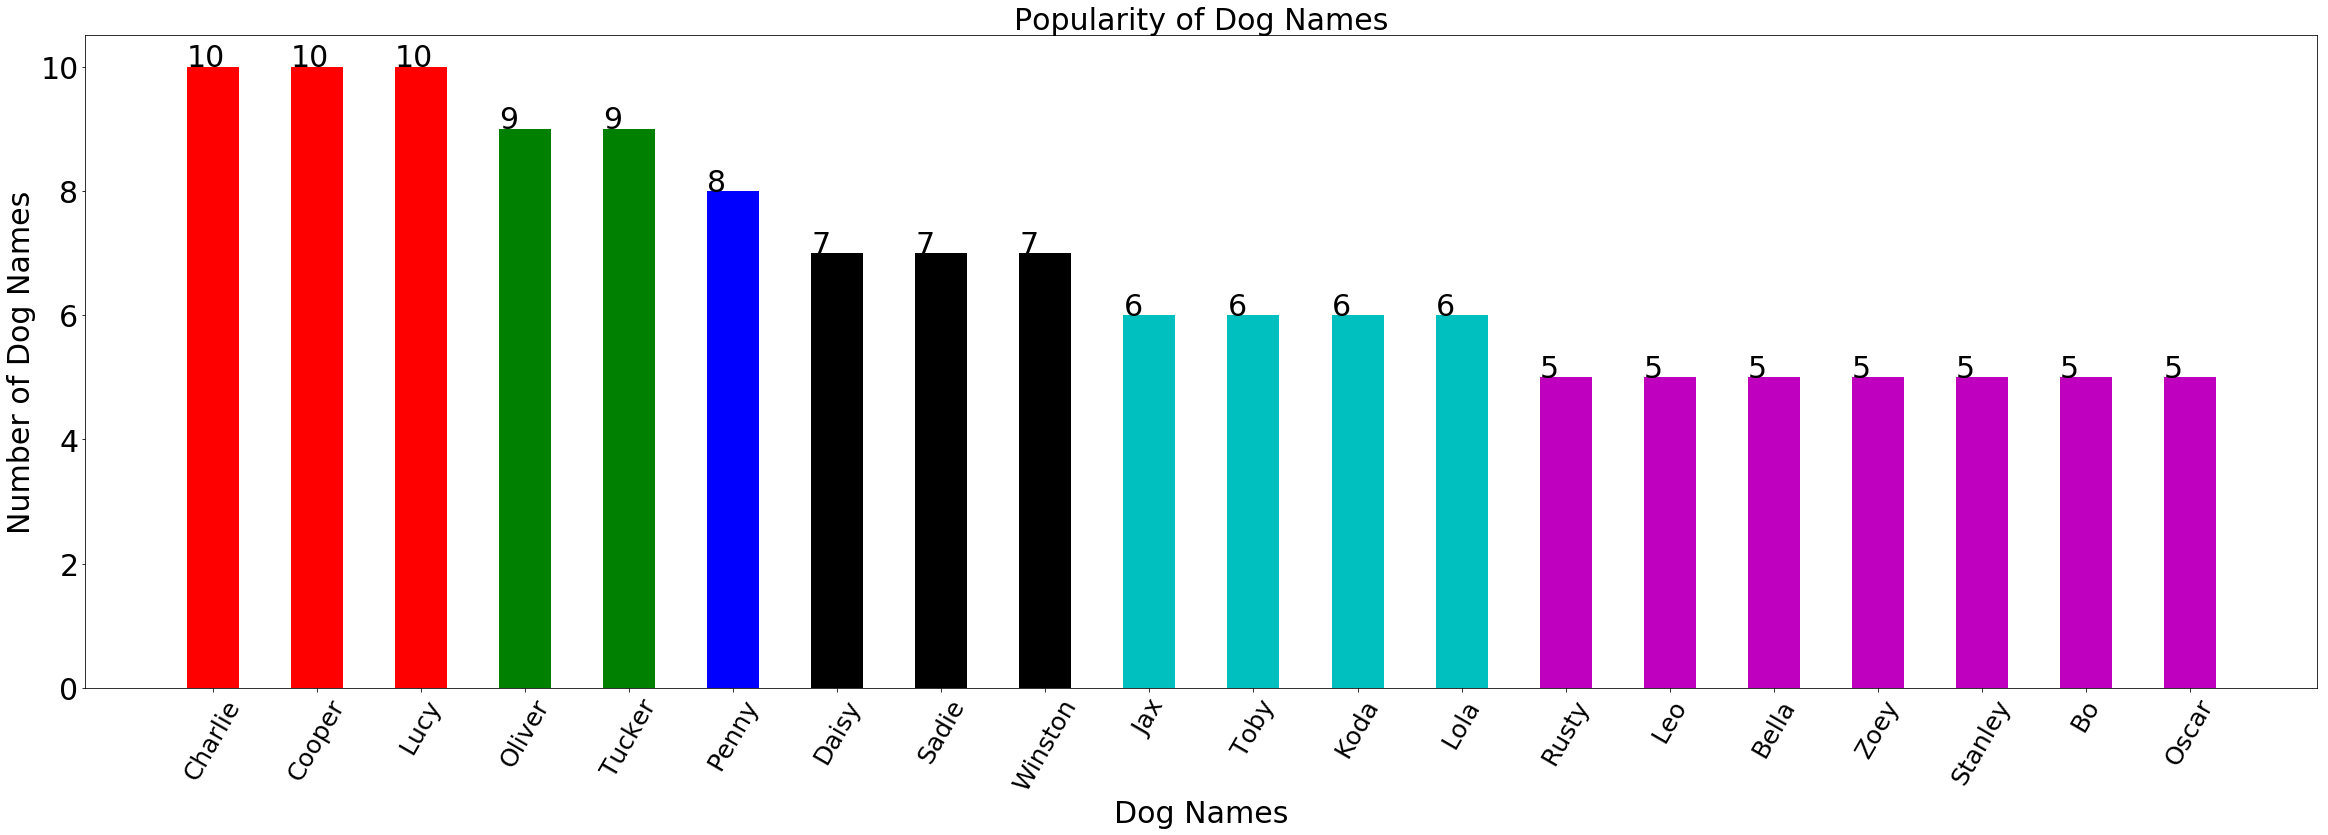

In [50]:
#### 绘制Bar图，x轴表示狗狗名字，y轴表示名字在数据集中出现的次数，以此直观的展示狗狗名字受欢迎的程度
fig,ax = plt.subplots(figsize=(40,12))
ind = range(len(popular_dog_names))
width = 0.5
colors = ['r','r','r','g','g','b','k','k','k','c','c','c','c','m','m','m','m','m','m','m']
rects = ax.bar(ind,popular_dog_names.values,width=width,color = colors)
ax.set_title("Popularity of Dog Names",fontsize=30)
ax.set_xlabel('Dog Names',fontsize=30)
ax.set_ylabel('Number of Dog Names',fontsize=30)
ax.set_xticks(ind)
ax.set_xticklabels(popular_dog_names.index,fontsize=25,rotation=60)
#### 将y轴标记字号改大
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
    
#### 将狗狗名字在数据集出现的次数标记在相应的Bar上
for rect in rects:
    x = rect.get_x()
    y = rect.get_height()
    ax.text(x,y,y,fontsize=30)

plt.show()

由上图可知，最受欢迎的狗狗名字如下：
并列第一名有3个名字，均在数据集中出现次数10次，分别是'Lucy','Charlie','Cooper'；
并列第二名的有2个名字，均在数据集中出现次数9次，分别是'Tucker','Oliver'；
第三名是'Penny'，在数据集中出现次数8次，；
并列第四名的有3个名字，均在数据集中出现次数7次，分别是'Sadie','Winston','Daisy'；
并列第五名的有4个名字，均在数据集中出现次数6次，分别是'koda','Lola','Toby','Jax'；
并列第六名的有7个名字，均在数据集中出现次数5次，分别是'Oscar','Zoey','Stanley','Bella','Leo','Bo','Rusty'.

#### 4.哪个地位(stage)的狗狗更受欢迎与青睐？

In [51]:
#### 使用 groupby函数按照狗狗地位分类，得到不同分类下转发和点赞总数数据sizes_retweet_favorite 和 平均评分数据sizes_retweet_favorite
df_dog['rate'] = df_dog['rating_numerator'] / df_dog['rating_denominator']
sizes_rate = df_dog.groupby('stage').rate.mean()
sizes_retweet_favorite = df_dog.groupby('stage').total_retweet_favorite_count.sum()
sizes_retweet_favorite.index

Index(['doggo', 'doggo,floofer', 'doggo,pupper', 'doggo,puppo', 'floofer',
       'pupper', 'puppo'],
      dtype='object', name='stage')

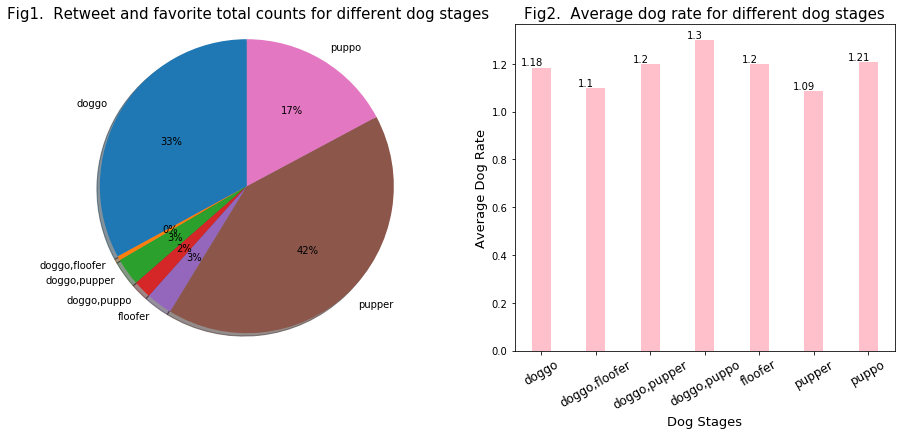

In [53]:
#### 绘制Pie图，直观的表示不同狗狗地位的转发和点赞总数及平均评分情况
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
#### 不同狗狗地位的转发和点赞总数情况
labels = sizes_retweet_favorite.index
#explode = (0,0,0,0.1,0,0,0,)
ax1.pie(sizes_retweet_favorite.values,labels=labels,autopct='%1.0f%%',shadow=True,startangle=90)
ax1.set_title('Fig1.  Retweet and favorite total counts for different dog stages',fontsize=15)
ax1.axis('equal') # 保证饼型图是圆形
#### 不同狗狗地位的平均评分情况
ind = range(len(sizes_rate))
width = 0.35
rects = ax2.bar(ind,sizes_rate.values,width=width,color='pink')
ax2.set_title('Fig2.  Average dog rate for different dog stages',fontsize=15)
ax2.set_xlabel('Dog Stages',fontsize=13)
ax2.set_ylabel('Average Dog Rate',fontsize=13)
ax2.set_xticks(ind)
ax2.set_xticklabels(sizes_rate.index,fontsize=12,rotation=30)
for rect in rects:
    y = rect.get_height()
    x = rect.get_x()
    ax2.text(x,y,y.round(2),ha='center',va='bottom',fontsize=10)
plt.show()

由上图可知，狗狗地位的转发和点赞总数占比依次为'pupper'(42%) > 'doggo'(33%) > 'puppo'(17%) > 'floofer'(3%) = pupper,doggo(3%) > puppo,doggo(2%)；
但是各个狗狗地位的平均评分相差不大，平均分最高分是puppo,doggo组合(13/10)，最低分是pupper（11/10）。其中doggo、floofer、pupper和doggo组合、puppo的平均得分均约等于12/10；
综合来看，pupper虽然得分不高但是较受欢迎，其次是doggo。floofer受欢迎程度低，可能并不是每个人都能接受皮毛过量的狗狗。各种组合的狗狗毕竟少数，所以得到的赞数和转发数有限，但是评分不低，狗多力量大啊！